## Data folder
1. **_token__202310192220.csv, ada_002_202310161931.csv, chunk_202310152206.csv, 
crawl_202310192223.csv, html_content_202310192222.csv, html_content_to_chunk_202310192222.csv
score_202310192218.csv, query_202310192219.csv, documents_202310242128.csv**
are from https://github.com/ai-cfia/louis-db/blob/main/img/database-schema.png as in the schema diagram

2. **document_topic_labelled.csv** contains following columns - ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'id', 'chunk_id', 'url',
       'title', 'subtitle', 'content', 'embedding', 'tokens_count',
       'last_updated', 'score_x', 'embedding_np', 'entity_id', 'score_y',
       'score_type', 'topic_depth_1', 'topic_depth_2', 'topic_depth_3',
       'topic_depth_1_label', 'topic_depth_2_label', 'topic_depth_3_label']
3. **document_topic_unlabelled.csv** is document_topic_labelled.csv but there is no labels
4. **document_topic_depths.csv** this is dataframe extracted from Atlas API where response.map[0].topics.df. contains ['Unnamed: 0', 'id', 'topic_depth_1', 'topic_depth_2', 'topic_depth_3']
5. **document_np_embedding_cluster.csv** this is a dataframe that has result run of AgglomerativeClustering from sklearn contains ['Unnamed: 0', 'id', 'title', 'subtitle', 'content', 'embedding',
       'score', 'cluster']

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import openai
import nomic
from nomic import atlas
from nomic import AtlasProject
import ast
from tqdm import tqdm
from sklearn.manifold import TSNE
NOMIC_TONY_API_TOKEN = os.environ['NOMIC_TONY_API_TOKEN']
pd.set_option('max_colwidth', 1000)

## Chunk_292310152206.csv

In [2]:
df = pd.read_csv('../data/chunk_202310152206.csv', encoding='utf-8-sig')
df[12:15]['text_content']

12    Japanese beetle – Popillia japonica (Newman) A coordinated response to eradicate Japanese beetle in British Columbia The Canadian Food Inspection Agency (CFIA), the British Columbia Ministry of Agriculture, Food and Fisheries (AFF), the cities of Burnaby, Port Coquitlam, Vancouver, and other industry and non-governmental stakeholders, are working together to respond to the detections of Japanese beetle in Burnaby, Port Coquitlam and Vancouver in 2021. Japanese beetle was first detected in British Columbia (BC) in 2017, in the False Creek area of Vancouver. Learn more about the CFIA’s eradication response and movement controls in BC. Japanese beetle, Popillia japonica, is an invasive plant pest that was first introduced to eastern North America from Japan in 1916. This insect can significantly damage landscape plants, ornamental plants, fruit and vegetable gardens, nurseries, orchards, and agricultural crops. Japanese beetle larvae feed on the roots of turf grass and other plants.

In [6]:
print(df['text_content'][0])
print(type(df['text_content'][0]))

Export of Dogs and Cats to French Polynesia This page is part of the Guidance Document Repository (GDR). Looking for related documents? Search for related documents in the Guidance Document Repository To export a pet (dog or cat) from Canada to French Polynesia you must comply with all of the requirements outlined in the International Health Certificate for Dogs and Cats Export to French Polynesia – PDF (486 kb). Review the certificate and ensure that all requirements are met in advance of travel. This includes: A Rabies Neutralizing Antibody Titre Test. This test must be performed in an approved laboratory between 3 and 12 months prior to dispatch. A passing result is 0.5 International Units (IU) or more. The animal(s) should be vaccinated or revaccinated against rabies and the vaccination should be valid at least 6 months preceding the loading. Animals younger than three (3) months do not need to be vaccinated against rabies. Two treatments against internal and external parasites. Wi

<Axes: >

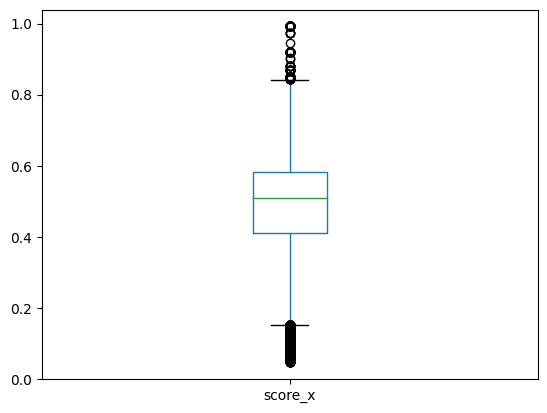

In [25]:
df_ada_score['score_x'].plot(kind='box')

<Axes: >

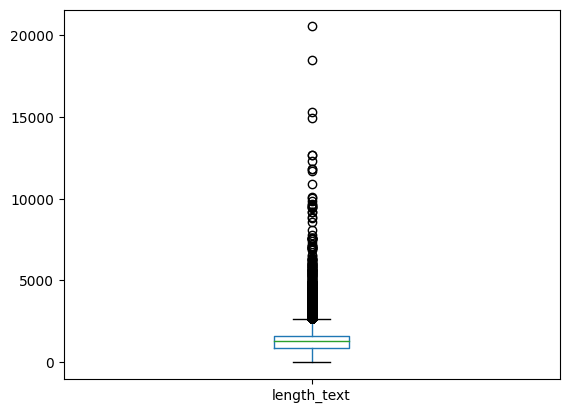

In [13]:
## graph of text_content length distribution
df['length_text'] = df['text_content'].apply(lambda x:len(x) if type(x)!=float else 0)
df['length_text'].plot(kind='box')

## ada_002_202310161931.csv (Embedding)


In [7]:
df_ada = pd.read_csv('../data/ada_002_202310161931.csv', encoding='utf-8-sig')
print(df_ada.head(1))
print('len(df_ada)- ',len(df_ada))

                                     id                              token_id  \
0  7a799462-f1e6-409f-87d2-44d789b61524  aa3382ee-a2b4-4042-8dd1-b9c2e2c30a5b   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [3]:
df = pd.read_csv('../data/document_np_embedding_cluster.csv')
df.columns

Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'content', 'embedding',
       'score', 'cluster'],
      dtype='object')

In [ ]:
df['embedding_np'] = df['embedding'].apply(lambda x: ast.literal_eval(x))
numpy_df_ada = np.array(list(df['embedding_np']))

In [11]:
numpy_df_ada[2].shape

(1536,)

## ada text embedding visualisation

In [8]:
df_ada = df_ada[:10000]

In [9]:
df_ada['embedding_np'] = df_ada['embedding'].apply(lambda x: ast.literal_eval(x))
numpy_df_ada = np.array(list(df_ada['embedding_np']))


In [6]:
# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(numpy_df_ada)
vis_dims.shape

(5000, 2)

Text(0.5, 1.0, 'Ada text embedding visualized in language using t-SNE')

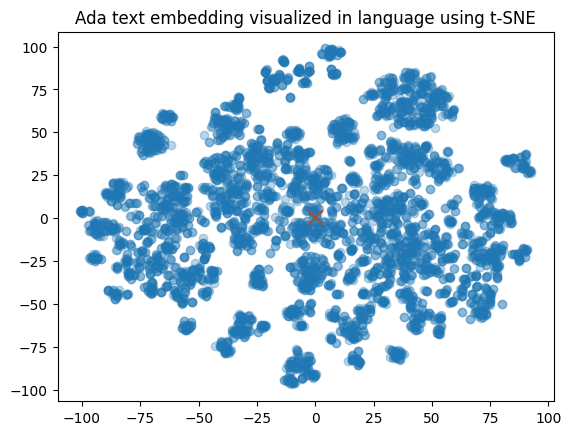

In [10]:
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

plt.scatter(x, y, alpha=0.3)
for score in [0,1,2,3,4]:
    avg_x = np.array(x).mean()
    avg_y = np.array(y).mean()
    plt.scatter(avg_x, avg_y, marker='x', s=100)

plt.title("Ada text embedding visualized in language using t-SNE")

Text(0.5, 1.0, 'Ada text embedding visualized in language using t-SNE')

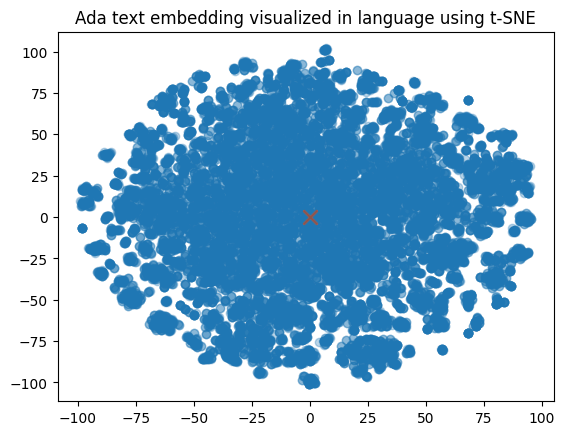

In [11]:
df_ada = pd.read_csv('../data/ada_002_202310161931.csv', encoding='utf-8-sig')
df_ada = df_ada[:20000]
df_ada['embedding_np'] = df_ada['embedding'].apply(lambda x: ast.literal_eval(x))
numpy_df_ada = np.array(list(df_ada['embedding_np']))

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(numpy_df_ada)
vis_dims.shape
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

plt.scatter(x, y, alpha=0.3)
for score in [0,1,2,3,4]:
    avg_x = np.array(x).mean()
    avg_y = np.array(y).mean()
    plt.scatter(avg_x, avg_y, marker='x', s=100)

plt.title("Ada text embedding visualized in language using t-SNE")

## PCA 3d

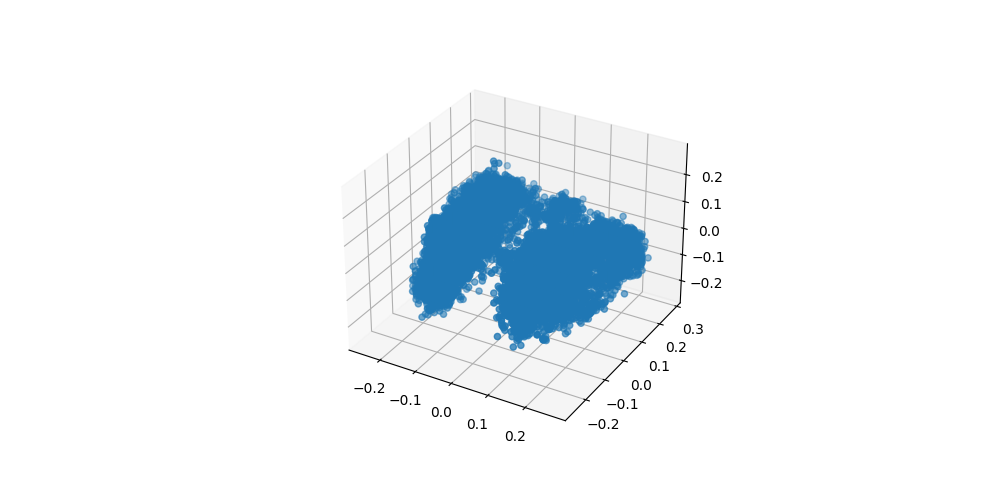

In [13]:
%matplotlib widget
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
vis_dims = pca.fit_transform(numpy_df_ada)
#samples["embed_vis"] = vis_dims.tolist()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')

# Plot each sample category individually such that we can set label name.
x=vis_dims[:, 0]
y=vis_dims[:, 1]
z=vis_dims[:, 2]
ax.scatter(x, y, zs=z)

# ax.legend(bbox_to_anchor=(1.1, 1))

In [ ]:
import pandas as pd
import os
import openai
os.environ["OPENAI_API_KEY"] = 'bac09550d21e4536b3aef7006af9d1bb'
#openai.api_key = os.environ["bac09550d21e4536b3aef7006af9d1bb"]
samples = pd.read_json("../data/dbpedia_samples.jsonl", lines=True)
categories = sorted(samples["category"].unique())
print("Categories of DBpedia samples:", samples["category"].value_counts())
from openai.embeddings_utils import get_embeddings
# NOTE: The following code will send a query of batch size 200 to /embeddings
matrix = get_embeddings(samples["text"].to_list(), engine="text-embedding-ada-002")
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
vis_dims = pca.fit_transform(matrix)
samples["embed_vis"] = vis_dims.tolist()
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')
cmap = plt.get_cmap("tab20")

# Plot each sample category individually such that we can set label name.
for i, cat in enumerate(categories):
    sub_matrix = np.array(samples[samples["category"] == cat]["embed_vis"].to_list())
    
    x=sub_matrix[:, 0]
    y=sub_matrix[:, 1]
    z=sub_matrix[:, 2]
    colors = [cmap(i/len(categories))] * len(sub_matrix)
    ax.scatter(x, y, zs=z, zdir='z', c=colors, label=cat)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(bbox_to_anchor=(1.1, 1))

[29.30330574 29.68475728 29.3835201  28.1007097  31.800068   29.35701361
 25.23124183 24.42095016 29.27928669 29.47961    25.31969987 26.07392105
 31.71885051 29.25056388 27.19744933 29.32531426 27.60607287 31.35867233
 29.65792369 28.6019513  28.86390922 26.5712685  27.88915455 30.19909575
 29.49390254 25.65827583 24.44851293 24.85512963 24.20892848 27.32544516
 26.08269632 26.26672361 31.75625875 23.9984925  26.4943768  30.04759288
 31.75607534 27.34888645 26.02778995 28.10677133 23.43147359 26.50043326
 31.15673281 24.44916388 29.69259021 28.69676746 25.91762016 31.30138879
 25.13503795 30.41551014 29.75546426 24.02406007 30.60825121 31.31538916
 24.98753113 31.39748488 27.40098869 27.27246776 23.80250725 25.0695336
 29.44343669 27.46513546 29.89840441 31.0711759  29.95000716 31.34456859
 28.53186825 28.48157392 29.16216379 25.25911671 30.54053873 24.06754055
 30.17511268 31.54103841 24.33256589 31.16184786 30.09535993 29.91565257
 28.38646835 26.97931056 29.50734218 26.74956425 25.

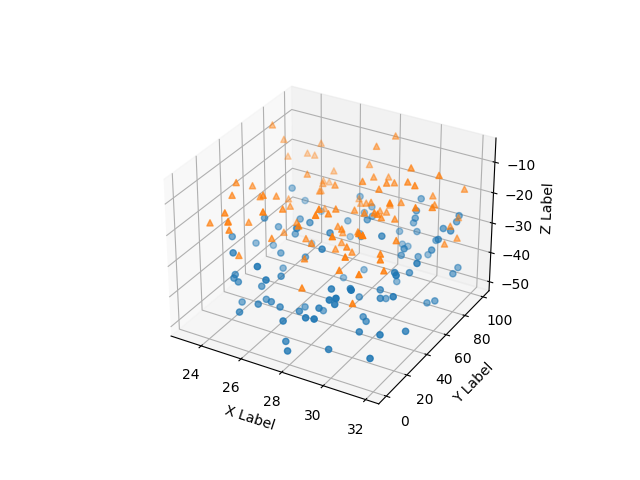

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [2]:
!nomic login NOMIC_TONY_API_TOKEN
df_ada = pd.read_csv('../data/ada_002_202310161931.csv', encoding='utf-8-sig')
df_ada['embedding_np'] = df_ada['embedding'].apply(lambda x: ast.literal_eval(x))
numpy_df_ada = np.array(list(df_ada['embedding_np']))
project = atlas.map_embeddings(embeddings=numpy_df_ada)

2023-10-20 05:29:38.051 | WARNING  | nomic.atlas:map_embeddings:95 - An ID field was not specified in your data so one was generated for you in insertion order.
2023-10-20 05:29:39.868 | INFO     | nomic.project:_create_project:790 - Creating project `towering-plight` in organization `tonylee015`
2023-10-20 05:29:40.755 | INFO     | nomic.atlas:map_embeddings:111 - Uploading embeddings to Atlas.
18it [00:04,  3.90it/s]                        
2023-10-20 05:29:47.087 | INFO     | nomic.project:_add_data:1422 - Upload succeeded.
2023-10-20 05:29:47.090 | INFO     | nomic.atlas:map_embeddings:130 - Embedding upload succeeded.
2023-10-20 05:29:48.136 | INFO     | nomic.project:create_index:1132 - Created map `towering-plight` in project `towering-plight`: https://atlas.nomic.ai/map/a1d76c4f-780a-4a3d-81cc-2c095d3cccbc/ef803816-04e3-4cd7-8eb6-a29c6b4c2438
2023-10-20 05:29:48.138 | INFO     | nomic.atlas:map_embeddings:143 - towering-plight: https://atlas.nomic.ai/map/a1d76c4f-780a-4a3d-81cc

In [27]:
num_embeddings = 1000
embeddings_t = np.random.rand(num_embeddings, 256)

In [44]:
numpy_df_ada = np.array(list(df_ada['embedding_np'][:5000]))
project = atlas.map_embeddings(embeddings=numpy_df_ada)

2023-10-17 05:45:19.663 | WARNING  | nomic.atlas:map_embeddings:95 - An ID field was not specified in your data so one was generated for you in insertion order.
2023-10-17 05:45:20.894 | INFO     | nomic.project:_create_project:790 - Creating project `tangible-ringworm` in organization `tonylee015`
2023-10-17 05:45:21.727 | INFO     | nomic.atlas:map_embeddings:111 - Uploading embeddings to Atlas.
100%|██████████| 1/1 [00:02<00:00,  2.12s/it]
2023-10-17 05:45:23.934 | INFO     | nomic.project:_add_data:1422 - Upload succeeded.
2023-10-17 05:45:23.936 | INFO     | nomic.atlas:map_embeddings:130 - Embedding upload succeeded.
2023-10-17 05:45:24.931 | INFO     | nomic.project:create_index:1132 - Created map `tangible-ringworm` in project `tangible-ringworm`: https://atlas.nomic.ai/map/e3495318-0e83-4d34-93d7-7f88c04424cf/99e087f6-7b99-424d-ac03-8a6b20628e72
2023-10-17 05:45:24.933 | INFO     | nomic.atlas:map_embeddings:143 - tangible-ringworm: https://atlas.nomic.ai/map/e3495318-0e83-4d3

## Just merging .csv files - aborted, it was just document schema

In [ ]:
df_ada = pd.read_csv('../data/ada_002_202310161931.csv')
df_token = pd.read_csv('../data/_token__202310192220.csv')
df_chunk = pd.read_csv('../data/chunk_202310152206.csv')
df_crawl = pd.read_csv('../data/crawl_202310192223.csv')
df_html_content = pd.read_csv('../data/html_content_202310192222.csv')
df_html_content_chunk = pd.read_csv('../data/html_content_to_chunk_202310192222.csv')
df_score = pd.read_csv('../data/score_202310192218.csv')

In [3]:
df_crawl = pd.read_csv('../data/crawl_202310192223.csv')
df_score = pd.read_csv('../data/score_202310192218.csv')
print('df_crawl.columns',df_crawl.columns)
print('df_score.columns',df_score.columns)

df_crawl.columns Index(['id', 'url', 'title', 'lang', 'last_crawled', 'last_updated',
       'last_updated_date', 'md5hash'],
      dtype='object')
df_score.columns Index(['entity_id', 'score', 'score_type'], dtype='object')


In [4]:
df_crawl = df_crawl[['id','title','md5hash']]
df_score = df_score[['entity_id', 'score', 'score_type']]
df_crawlscore = df_crawl.join(df_score, lsuffix='id', rsuffix='entity_id')

## Nomic vis

In [38]:
!nomic login NOMIC_TONY_API_TOKEN
df_doc = pd.read_csv('../data/documents_202310221252.csv', encoding='utf-8-sig')[:1000]
for i in range(len(df_doc)):
    df_doc['id'].iloc[i] = df_doc.iloc[i]['id']+str(i)
# check for duplicate id
print(df_doc['id'].duplicated().sum())

# check for id max length <= 36
df_doc['id'] = df_doc['id'].apply(lambda x: x[-36:])
print('max id length-',df_doc['id'].str.len().max())
print(len(df_doc))
df_doc['embedding_np'] = df_doc['embedding'].apply(lambda x: ast.literal_eval(x))
numpy_df_doc = np.array(list(df_doc['embedding_np']))

df_doc_dict = df_doc[['id','title','subtitle','content','score']].to_dict('records')

response = atlas.map_embeddings(embeddings=numpy_df_doc,
                                data=df_doc_dict,
                                id_field='id',
                                colorable_fields=['score'],
                                name="Test 1000 entries for response 3",
                                description="A text map with a pgvector embedding.",
                                #build_topic_model=True,
                                reset_project_if_exists=True)

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
2023-10-24 04:24:09.926 | INFO     | nomic.project:__init__:702 - Found existing project `Test 1000 entries for response 3` in organization `tonylee015`. Clearing it of data by request.
2023-10-24 04:24:10.500 | INFO     | nomic.project:_create_project:790 - Creating project `Test 1000 entries for response 3` in organization `tonylee015`
2023-10-24 04:24:11.376 | INFO     | nomic.atlas:map_embeddings:111 - Uploading embeddings to Atlas.
1it [00:00,  1.06it/s]
2023-10-24 04:24:12.347 | INFO     | nomic.project:_add_data:1422 - Upload succeeded.
2023-10-24 04:24:12.348 | INFO     | nomic.atlas:map_embeddings:130 - Embedding u

0
max id length- 36
1000


## Clustering

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_

In [3]:
#df_ada['embedding_np']
df_doc = pd.read_csv('../data/documents_202310221252.csv', encoding='utf-8-sig')
for i in range(len(df_doc)):
    df_doc['id'].iloc[i] = df_doc.iloc[i]['id']+str(i)
# check for duplicate id
print(df_doc['id'].duplicated().sum())
# check for id max length <= 36
df_doc['id'] = df_doc['id'].apply(lambda x: x[-36:])
print('max id length-',df_doc['id'].str.len().max())
print(len(df_doc))
df_doc['embedding_np'] = df_doc['embedding'].apply(lambda x: ast.literal_eval(x))
matrix = np.vstack(df_doc['embedding_np'].values)
matrix.shape

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0
max id length- 36
103836


(103836, 1536)

In [5]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=None, affinity="euclidean", linkage="ward", distance_threshold=0.9)
clustering.fit(matrix)
labels = clustering.labels_
df_ada['cluster'] = labels

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [44]:
df_ada.groupby("cluster").score.mean().sort_values()

cluster
107    0.073202
87     0.148141
127    0.179905
141    0.263733
44     0.286225
         ...   
161    0.697957
109    0.744579
170    0.757905
21     0.841514
90     0.917010
Name: score, Length: 181, dtype: float64

In [6]:
df_ada.to_csv('../data/document_np_embedding_cluster.csv', encoding='utf-8-sig')

In [3]:
df_ada.cluster.value_counts()

5887    672
6063    670
3839    623
6015    408
5759    348
       ... 
3126      2
6949      2
5065      2
5970      2
6529      2
Name: cluster, Length: 7188, dtype: int64

In [5]:
df_ada.cluster.max()

7187

## Get Atlas cluster 

In [58]:
from nomic import AtlasProject
project = AtlasProject(name='Test labelling extraction')
map = project.maps[0]


2023-10-25 05:49:00.169 | INFO     | nomic.project:__init__:713 - Loading existing project `Test labelling extraction` from organization `tonylee015`.


In [36]:
tags = map.tags.get_tags()
for tag, datum_ids in tags.items():
    print(tag, "Count:", len(datum_ids), datum_ids[:10])

#print(project.get_data(ids=tags['Unlabeled topic'][:2]))

In [61]:
print(map.topics.df)
print(type(map.topics.df))
topic_dataframe = map.topics.df

                                         id topic_depth_1 topic_depth_2  \
0      97ec-9693-423d-9174-cb44a7ebc72f7800     🤷‍♂️1🤷‍♀️     🤷‍♂️6🤷‍♀️   
1      fa35-b406-4033-b20b-f87af8b3ff967801     🤷‍♂️1🤷‍♀️     🤷‍♂️6🤷‍♀️   
2      87b1-652b-41c8-8a7e-84fff7eb980a7802     🤷‍♂️1🤷‍♀️     🤷‍♂️6🤷‍♀️   
3      1e24-c7dc-4372-857f-f518147b34a57803     🤷‍♂️1🤷‍♀️     🤷‍♂️6🤷‍♀️   
4      5552-f467-4657-bfe3-9deeebf0a2bb7804     🤷‍♂️1🤷‍♀️     🤷‍♂️6🤷‍♀️   
...                                     ...           ...           ...   
66475  702-f220-44f3-b1fa-c7be37ace2c873064     🤷‍♂️6🤷‍♀️    🤷‍♂️68🤷‍♀️   
66476  c37-dba3-4ade-86b2-6c18cc7c2dca73065     🤷‍♂️6🤷‍♀️    🤷‍♂️68🤷‍♀️   
66477  8c6-45ed-44de-a1a5-1bbc3f5db8ad73070     🤷‍♂️6🤷‍♀️    🤷‍♂️68🤷‍♀️   
66478  8c6-45ed-44de-a1a5-1bbc3f5db8ad73072     🤷‍♂️6🤷‍♀️    🤷‍♂️68🤷‍♀️   
66479  317-51e4-4325-9ac5-12bbe930d1b873079     🤷‍♂️6🤷‍♀️    🤷‍♂️68🤷‍♀️   

      topic_depth_3  
0        🤷‍♂️41🤷‍♀️  
1        🤷‍♂️41🤷‍♀️  
2        🤷‍♂️41🤷‍♀️  
3        🤷‍

In [62]:
topic_dataframe.columns

Index(['id', 'topic_depth_1', 'topic_depth_2', 'topic_depth_3'], dtype='object')

In [75]:
topic_dataframe['topic_depth_3'][0].split('♂️')[1].split('🤷')[0]

'41'

In [78]:
## Remove this weird character🤷♂️
topic_dataframe['topic_depth_1'] = topic_dataframe['topic_depth_1'].apply(lambda x: x.split('♂️')[1].split('🤷')[0])
topic_dataframe['topic_depth_2'] = topic_dataframe['topic_depth_2'].apply(lambda x: x.split('♂️')[1].split('🤷')[0])
topic_dataframe['topic_depth_3'] = topic_dataframe['topic_depth_3'].apply(lambda x: x.split('♂️')[1].split('🤷')[0])

In [80]:
topic_dataframe.to_csv('../data/document_topic_depths.csv')

## Merge Atlas cluster with document.csv

In [4]:
df_doc = pd.read_csv('../data/document_3.csv', encoding='utf-8-sig')
df_doc.columns

Index(['Unnamed: 0', 'id', 'chunk_id', 'url', 'title', 'subtitle', 'content',
       'embedding', 'tokens_count', 'last_updated', 'score_x', 'embedding_np',
       'entity_id', 'score_y', 'score_type'],
      dtype='object')

Bad pipe message: %s [b'[\xdc0\x87 \xba}\x00\xf9\xcf6Q\xf1sn\xbey4 @JM\xdd\xb0\xfe\x98H\x83S\xeee\x05\x84\x8d\xb2\xdd\xb9\x16\x9aB\xd5>Br\r\xde$Y\xa6\xdc\xf7\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e']
Bad pipe message: %s [b"D\xe0q\xbcB57\xcb'[\x01\x91d\xe2\x8e\xec . \xf8\xec<<\x08\x81\xe2.\x92\xb6\x94RE\x1fM9\x88\x94\xb73C~K\x91\x87\xe3^\xaa\xed\n\x8e\x90\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08"]
Bad pipe message: %s [b'\x08\x08\t\x08\n\x08']
Bad pipe message: %s [b'\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x

In [83]:
df_topic = df_doc.merge(topic_dataframe, on='id', how='left')

In [92]:
df_topic['topic_depth_1'].value_counts()

2    19753
1    15754
4     7640
0     6873
5     6369
7     6120
3     2843
6     1128
Name: topic_depth_1, dtype: int64

In [90]:
df_topic['topic_depth_2'].value_counts()

28    5159
36    3412
2     3291
26    3135
7     3016
      ... 
78       9
27       7
71       4
18       2
30       2
Name: topic_depth_2, Length: 83, dtype: int64

In [89]:
df_topic['topic_depth_3'].value_counts()

17     689
101    679
94     644
9      607
267    597
      ... 
208      4
410      4
134      2
233      2
100      1
Name: topic_depth_3, Length: 440, dtype: int64

In [93]:
df_topic.to_csv('../data/document_topic_unlabelled.csv', encoding='utf-8-sig')

## TfidfVectorizer

In [2]:
df_topic = pd.read_csv('../data/document_topic_unlabelled.csv', encoding='utf-8-sig')

In [7]:
print(df_topic['topic_depth_1'].unique())
print(len(df_topic['topic_depth_1'].unique()))

[ 1.  4. nan  2.  5.  0.  3.  7.  6.]
9


In [13]:
type(df_topic['topic_depth_1'][0])

numpy.float64

## Get tfidfvectorizer labels for each Atlas cluster. Do it three times for three different topic depth clusters

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
df_topic['topic_depth_1_label'] = ''
for i in tqdm(range(len(df_topic['topic_depth_1'].unique())-1)):
    temp_topic = df_topic[df_topic['topic_depth_1']==i]
    print('len(temp_topic)- ',len(temp_topic))
    corpus = temp_topic['content'].tolist()
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(corpus)
    feature_array = np.array(vectorizer.get_feature_names_out())
    tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]

    n = 3
    top_n = feature_array[tfidf_sorting][:n]
    print(top_n)
    count = 0
    for j in range(len(df_topic)):
        if df_topic['topic_depth_1'].iloc[j] == i:
            df_topic['topic_depth_1_label'].iloc[j] = top_n
            count += 1
    print(count)

  0%|          | 0/8 [00:00<?, ?it/s]/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
 12%|█▎        | 1/8 [00:20<02:23, 20.55s/it]/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
 25%|██▌       | 2/8 [01:18<04:14, 42.46s/it]/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying

len(temp_topic)-  6873
['fertilizer' 'supplement' 'materials']
6873
len(temp_topic)-  15754
['008' 'rad' 'broche']
15754
len(temp_topic)-  19753
['attente' 'permission' 'active']
19753
len(temp_topic)-  2843
['media' '2342' '773']
2843
len(temp_topic)-  7640
['canola' 'gt200' 'line']
7640
len(temp_topic)-  6369
['leaves' 'flower' 'sugar']
6369
len(temp_topic)-  1128
['biologique' 'norme' 'certifiés']
1128
len(temp_topic)-  6120
['cut' 'patrick' 'burrage']
6120


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
df_topic['topic_depth_2_label'] = ''
for i in tqdm(range(len(df_topic['topic_depth_2'].unique())-1)):
    temp_topic = df_topic[df_topic['topic_depth_2']==i]
    print('len(temp_topic)- ',len(temp_topic))
    corpus = temp_topic['content'].tolist()
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(corpus)
    feature_array = np.array(vectorizer.get_feature_names_out())
    tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]

    n = 3
    top_n = feature_array[tfidf_sorting][:n]
    print(top_n)
    count = 0
    for j in range(len(df_topic)):
        if df_topic['topic_depth_2'].iloc[j] == i:
            df_topic['topic_depth_2_label'].iloc[j] = top_n
            count += 1

  0%|          | 0/83 [00:00<?, ?it/s]/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
  1%|          | 1/83 [00:00<01:04,  1.27it/s]/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
  2%|▏         | 2/83 [00:02<01:29,  1.10s/it]/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is try

len(temp_topic)-  88
['sfcr' '47' 'provisions']
len(temp_topic)-  572
['cette' 'certains' 'jour']
len(temp_topic)-  3291
['webinaires' 'teams' 'calendriers']
len(temp_topic)-  2922
['symptômes' 'la' 'sensibilisation']
len(temp_topic)-  1022
['reviews' 'regulatory' 'biosciences']
len(temp_topic)-  237
['crop' 'rotation' 'field']
len(temp_topic)-  2072
['sirop' 'râche' 'érable']
len(temp_topic)-  3016
['méthodes' 'désoxyribonucléique' 'adn']
len(temp_topic)-  1949
['090' 'chimie' 'ko']
len(temp_topic)-  2953
['semence' 'mélange' 'trèfle']
len(temp_topic)-  2600
['slightly' 'medium' 'pigmented']
len(temp_topic)-  299
['rabbits' 'rabbit' 'spread']
len(temp_topic)-  322
['branch' 'director' 'international']
len(temp_topic)-  85
['amps' 'penalty' 'violation']
len(temp_topic)-  702
['bacteria' 'bacterial' 'distances']
len(temp_topic)-  45
['les' 'et' 'le']
len(temp_topic)-  65
['établissements' 'des' 'liste']
len(temp_topic)-  385
['janvier' '1er' 'tableau']
len(temp_topic)-  2
['carcasses' '

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
df_topic['topic_depth_3_label'] = ''
for i in tqdm(range(len(df_topic['topic_depth_3'].unique())-1)):
    temp_topic = df_topic[df_topic['topic_depth_3']==i]
    print('len(temp_topic)- ',len(temp_topic))
    corpus = temp_topic['content'].tolist()
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(corpus)
    feature_array = np.array(vectorizer.get_feature_names_out())
    tfidf_sorting = np.argsort(X.toarray()).flatten()[::-1]

    n = 3
    top_n = feature_array[tfidf_sorting][:n]
    print(top_n)
    count = 0
    for j in range(len(df_topic)):
        if df_topic['topic_depth_3'].iloc[j] == i:
            df_topic['topic_depth_3_label'].iloc[j] = top_n
            count += 1

  0%|          | 0/440 [00:00<?, ?it/s]/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
  0%|          | 1/440 [00:00<05:22,  1.36it/s]/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
  0%|          | 2/440 [00:01<06:09,  1.19it/s]/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is 

len(temp_topic)-  88
['multiplication' 'destiné' 'zones']
len(temp_topic)-  229
['pression' 'consigner' 'du']
len(temp_topic)-  91
['shall' 'conveying' 'different']
len(temp_topic)-  40
['husband' 'started' 'experience']
len(temp_topic)-  212
['pain' 'odeur' 'chimique']
len(temp_topic)-  130
['marques' '18305' '12002']
len(temp_topic)-  579
['pommes' 'gd743' 'gs784']
len(temp_topic)-  162
['sample' 'seed' 'lot']
len(temp_topic)-  264
['brève' 'utilisation' 'description']
len(temp_topic)-  607
['archivée' 'page' 'jour']
len(temp_topic)-  163
['études' 'ciblées' 'les']
len(temp_topic)-  84
['élément' 'sous' 'inspection']
len(temp_topic)-  103
['screenings' 'grain' 'shall']
len(temp_topic)-  72
['zinc' 'gomme' '601']
len(temp_topic)-  14
['stakeholders' 'framework' 'report']
len(temp_topic)-  247
['garantie' 'cu' 'maximal']
len(temp_topic)-  177
['bleuet' 'mouche' 'québec']
len(temp_topic)-  689
['999' 'shows' 'identification']
len(temp_topic)-  332
['taraxacum' 'incertitude' 'est']
len(t

In [ ]:
## we don't want scores under score_threshold
score_threshold = 0.3
df_ada_score = df_topic[df_topic['score_x']>score_threshold]

!nomic login NOMIC_TONY_API_TOKEN
df_ada_score['embedding_np'] = df_ada_score['embedding'].apply(lambda x: ast.literal_eval(x))
numpy_df_doc = np.array(list(df_ada_score['embedding_np']))
df_ada_score['topic_depth_1_label'] = df_ada_score['topic_depth_1_label'].apply(lambda x: str(x))
df_ada_score['topic_depth_2_label'] = df_ada_score['topic_depth_2_label'].apply(lambda x: str(x))
df_ada_score['topic_depth_3_label'] = df_ada_score['topic_depth_3_label'].apply(lambda x: str(x))

df_doc_dict = df_ada_score[['id','title','subtitle','content','score_x','url','chunk_id','last_updated','tokens_count',
       'topic_depth_1', 'topic_depth_2', 'topic_depth_3',
       'topic_depth_1_label', 'topic_depth_2_label', 'topic_depth_3_label']].to_dict('records')

response = atlas.map_embeddings(embeddings=numpy_df_doc,
                                data=df_doc_dict,
                                id_field='id',                                
                                reset_project_if_exists=True,
                                colorable_fields=['score_x', 'last_updated'],
                                name="Pgvector space Labelled using tfidfvectorizer, score>0.3 #2",
                                description="A text map with a pgvector embedding.",
                                topic_label_field='topic_depth_3_label')




In [46]:
project = AtlasProject(name = 'Test labelling extraction')
map = project.maps[0]

2023-10-25 19:53:18.644 | INFO     | nomic.project:__init__:713 - Loading existing project `Test labelling extraction` from organization `tonylee015`.


## Trying to upload tfidf labels to Atlas -failed

In [51]:
print(map.topics.df)
topic_dataframe = map.topics.df

for i in range(len(topic_dataframe)):
    topic_dataframe['topic_depth_1'].iloc[i] = df_ada_score[df_ada_score['id']==topic_dataframe['id'].iloc[i]]['topic_depth_1_label'].iloc[0]
    topic_dataframe['topic_depth_2'].iloc[i] = df_ada_score[df_ada_score['id']==topic_dataframe['id'].iloc[i]]['topic_depth_2_label'].iloc[0]
    topic_dataframe['topic_depth_3'].iloc[i] = df_ada_score[df_ada_score['id']==topic_dataframe['id'].iloc[i]]['topic_depth_3_label'].iloc[0]

                                         id topic_depth_1 topic_depth_2  \
0      97ec-9693-423d-9174-cb44a7ebc72f7800     🤷‍♂️1🤷‍♀️     🤷‍♂️6🤷‍♀️   
1      fa35-b406-4033-b20b-f87af8b3ff967801     🤷‍♂️1🤷‍♀️     🤷‍♂️6🤷‍♀️   
2      87b1-652b-41c8-8a7e-84fff7eb980a7802     🤷‍♂️1🤷‍♀️     🤷‍♂️6🤷‍♀️   
3      1e24-c7dc-4372-857f-f518147b34a57803     🤷‍♂️1🤷‍♀️     🤷‍♂️6🤷‍♀️   
4      5552-f467-4657-bfe3-9deeebf0a2bb7804     🤷‍♂️1🤷‍♀️     🤷‍♂️6🤷‍♀️   
...                                     ...           ...           ...   
66475  702-f220-44f3-b1fa-c7be37ace2c873064     🤷‍♂️6🤷‍♀️    🤷‍♂️68🤷‍♀️   
66476  c37-dba3-4ade-86b2-6c18cc7c2dca73065     🤷‍♂️6🤷‍♀️    🤷‍♂️68🤷‍♀️   
66477  8c6-45ed-44de-a1a5-1bbc3f5db8ad73070     🤷‍♂️6🤷‍♀️    🤷‍♂️68🤷‍♀️   
66478  8c6-45ed-44de-a1a5-1bbc3f5db8ad73072     🤷‍♂️6🤷‍♀️    🤷‍♂️68🤷‍♀️   
66479  317-51e4-4325-9ac5-12bbe930d1b873079     🤷‍♂️6🤷‍♀️    🤷‍♂️68🤷‍♀️   

      topic_depth_3  
0        🤷‍♂️41🤷‍♀️  
1        🤷‍♂️41🤷‍♀️  
2        🤷‍♂️41🤷‍♀️  
3        🤷‍

In [55]:
project.maps[0].topics.metadata

,depth,topic_id,topic_depth_1,topic_description,topic_short_description,topic_depth_2,topic_depth_3
0,1,0,🤷‍♂️0🤷‍♀️,🤷‍♂️0🤷‍♀️,🤷‍♂️0🤷‍♀️,NaN,NaN
1,1,1,🤷‍♂️1🤷‍♀️,🤷‍♂️1🤷‍♀️,🤷‍♂️1🤷‍♀️,NaN,NaN
2,1,2,🤷‍♂️2🤷‍♀️,🤷‍♂️2🤷‍♀️,🤷‍♂️2🤷‍♀️,NaN,NaN
3,1,3,🤷‍♂️3🤷‍♀️,🤷‍♂️3🤷‍♀️,🤷‍♂️3🤷‍♀️,NaN,NaN
4,1,4,🤷‍♂️4🤷‍♀️,🤷‍♂️4🤷‍♀️,🤷‍♂️4🤷‍♀️,NaN,NaN
...,...,...,...,...,...,...,...
526,3,435,🤷‍♂️7🤷‍♀️,🤷‍♂️435🤷‍♀️,🤷‍♂️435🤷‍♀️,🤷‍♂️80🤷‍♀️,🤷‍♂️435🤷‍♀️
527,3,436,🤷‍♂️7🤷‍♀️,🤷‍♂️436🤷‍♀️,🤷‍♂️436🤷‍♀️,🤷‍♂️80🤷‍♀️,🤷‍♂️436🤷‍♀️
528,3,437,🤷‍♂️7🤷‍♀️,🤷‍♂️437🤷‍♀️,🤷‍♂️437🤷‍♀️,🤷‍♂️80🤷‍♀️,🤷‍♂️437🤷‍♀️
529,3,438,🤷‍♂️7🤷‍♀️,🤷‍♂️438🤷‍♀️,🤷‍♂️438🤷‍♀️,🤷‍♂️81🤷‍♀️,🤷‍♂️438🤷‍♀️


In [53]:
project.maps[0].topics.df = topic_dataframe
project.rebuild_maps()

AttributeError: can't set attribute 'df'

## Labelling using OpenAI LLM prompt enginnering - failed due to query size issue

In [121]:
# make Louise calling function
import os
import openai
AZURE_OPENAI_API_TOKEN = os.environ['AZURE_OPENAI_API_TOKEN']
def louise_inference(input):
    openai.api_type = "azure"
    openai.api_base = "https://azure-open-ai-common-infra.openai.azure.com/"
    openai.api_version = "2023-07-01-preview"
    openai.api_key = AZURE_OPENAI_API_TOKEN
    i = f"###INSTRUCTION\n What do the following CFIA documents have in common? ###Documents\n{input}\n###Answer:\n"
    response = openai.ChatCompletion.create(
        engine="ailab-llm",
        messages =[{"role":"user","content":i}],
        temperature=0,
        max_tokens=25,
        top_p=0.95,
        frequency_penalty=0,
        presence_penalty=0,
        stop=None)
    my_openai_obj = list(response.choices)[0]
    response_text = my_openai_obj.to_dict()['message']
    
    return response_text['content']
#r = louise_inference('hello, how are you doing today?')

In [122]:
for i in range(len(df_topic)):
    temp_topic = df_topic[df_topic['topic_depth_1']==str(i)]
    print('len(temp_topic)- ',len(temp_topic))
    temp_topic['content'] = temp_topic['content'].apply(lambda x: x+', ')
    input = " ".join(temp_topic['content'].tolist())
    louise_inference(input)
    break

len(temp_topic)-  6873


/tmp/ipykernel_6197/2980154994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_topic['content'] = temp_topic['content'].apply(lambda x: x+', ')


InvalidRequestError: This model's maximum context length is 8192 tokens. However, your messages resulted in 2131226 tokens. Please reduce the length of the messages.

In [123]:
for i in tqdm(range(len(df_topic))):
    temp_topic = df_topic[df_topic['topic_depth_1']==str(i)]
    print('len(temp_topic)- ',len(temp_topic))
    temp_topic['title'] = temp_topic['title'].apply(lambda x: x+', ')
    input = " ".join(temp_topic['title'].tolist())
    louise_inference(input)
    break

len(temp_topic)-  6873


/tmp/ipykernel_6197/2787862712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_topic['title'] = temp_topic['title'].apply(lambda x: x+', ')


InvalidRequestError: This model's maximum context length is 8192 tokens. However, your messages resulted in 234687 tokens. Please reduce the length of the messages.

In [ ]:
import pandas as pd
from tqdm import tqdm
import time
df = pd.read_excel('../data/AskCFIA_-_PowerBI_Data_-_For Chatbot.XLSX', sheet_name='Main Copy of Data')[['Sector', 'Description/background of the Enquiry or Issue']]

for i in tqdm(range(len(df))):
    if i % 9 == 0:
        time.sleep(7)
    answer = louise_inference(df['Description/background of the Enquiry or Issue'].iloc[i])

    if 'Answer: ' in answer:
        df['model_output'].iloc[i] = answer.split('Answer:')[1]
    else:
        df['model_output'].iloc[i] = answer
    found = False
    for c in class_list:
        if 'Answer: ' in answer:
            if c in answer.split('Answer:')[1]:
                df['classification'].iloc[i] = c
                found = True
                break
        else:
            if c in answer:
                df['classification'].iloc[i] = c
                found = True
                break
    if not found:
        df['classification'].iloc[i] = 'not found'
    
            
df.to_csv('../data/results/classification_test_louise_api.csv')